In [1]:
import numpy as np
import pyemma
from scipy import constants

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


In [2]:
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=200)
plt.rcParams["figure.figsize"] = (15,5)

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


In [4]:
metad_fe_trp_chi1 = np.loadtxt("./Trp-reweighting/fes_trpchi1chi2.dat")[:, 0]
metad_fe_trp_chi2 = np.loadtxt("./Trp-reweighting/fes_trpchi1chi2.dat")[:, 1]
metad_fe = np.loadtxt("./Trp-reweighting/fes_trpchi1chi2.dat")[:, 2]

In [5]:
metad_trp_chi = np.loadtxt("./Trp-reweighting/fes_trpopen.dat")[:, 0]
metad_fe_flap_open = np.loadtxt("./Trp-reweighting/fes_trpopen.dat")[:, 1]
metad_pop = np.loadtxt("./Trp-reweighting/fes_trpopen.dat")[:, 2]

In [11]:
metad_fe_tyr_chi1 = np.loadtxt("./Tyr-reweighting/fes_chi1_open.dat")[:, 0]
metad_fe_tyr_flap = np.loadtxt("./Tyr-reweighting/fes_chi1_open.dat")[:, 1]
metad_fetyr = np.loadtxt("./Tyr-reweighting/fes_chi1_open.dat")[:, 2]

In [7]:
# FE is written out in kJ/mol --> kT
# first convert to J/mol
conversion_factor = 1000
# then convert to J by dividing by Avogadro constant (units of mol^-1)
conversion_factor = conversion_factor / constants.N_A
# now convert from J to kT
conversion_factor = conversion_factor / (constants.k * 300)

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/plots/plots2d.py:803: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if levels == 'legacy':


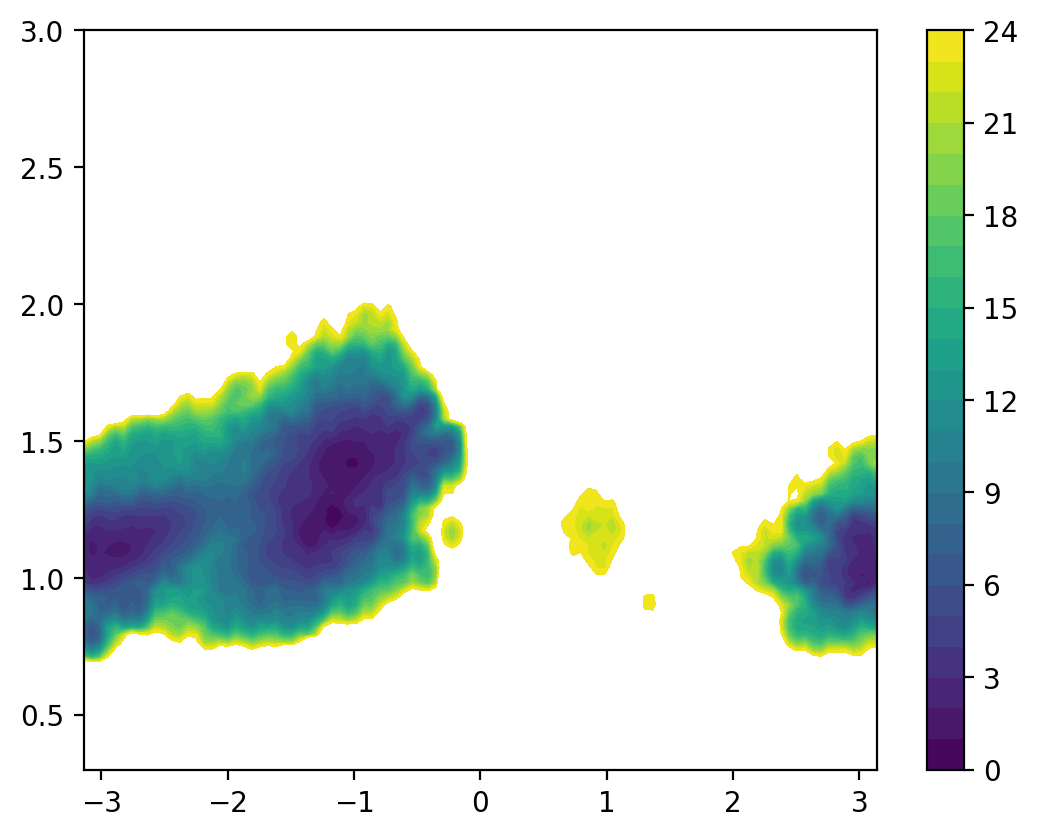

In [12]:
pyemma.plots.plot_contour(metad_fe_tyr_chi1, metad_fe_tyr_flap, metad_fetyr * conversion_factor, levels=np.arange(0, 25, 1), vmin=0, vmax=25)
plt.show()

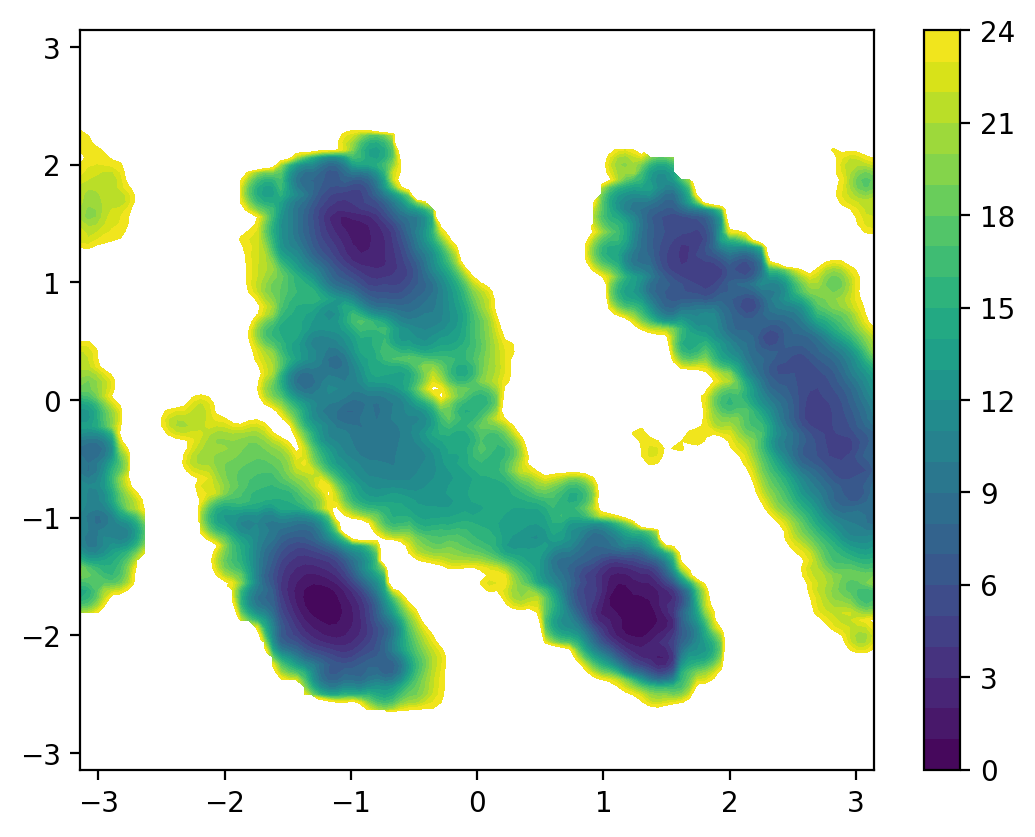

In [8]:
pyemma.plots.plot_contour(metad_fe_trp_chi1, metad_fe_trp_chi2, metad_fe * conversion_factor, levels=np.arange(0, 25, 1), vmin=0, vmax=25)
plt.show()

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/plots/plots2d.py:803: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if levels == 'legacy':


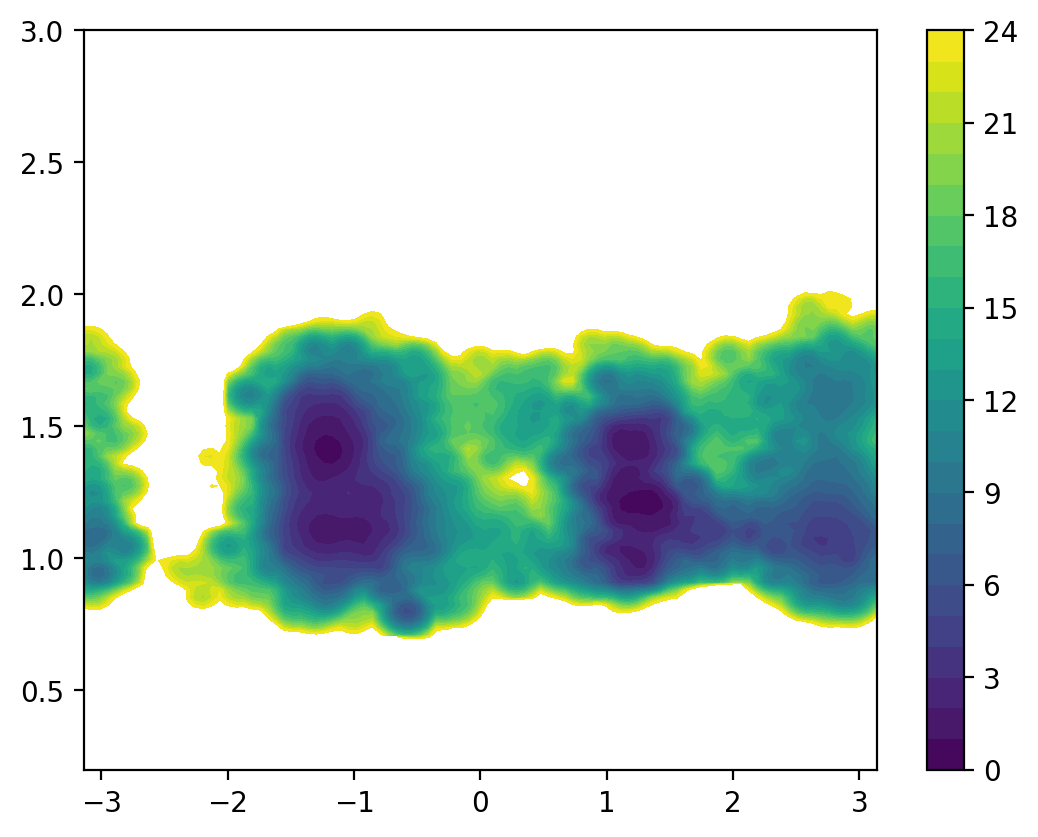

In [6]:
pyemma.plots.plot_contour(metad_trp_chi, metad_fe_flap_open, metad_pop * conversion_factor, levels=np.arange(0, 25, 1), vmin=0, vmax=25)
plt.show()

In [7]:
metad_pi = np.exp(-metad_fe * conversion_factor)
metad_pi = metad_pi / np.sum(metad_pi)

In [8]:
np.sum(metad_pi)

1.0

In [9]:
metad_poppi = np.exp(-metad_pop * conversion_factor)
metad_poppi = metad_poppi / np.sum(metad_poppi)

In [8]:
metad_poppityr = np.exp(-metad_fetyr * conversion_factor)
metad_poppityr = metad_poppityr / np.sum(metad_poppityr)

In [9]:
np.sum(metad_poppityr)

1.0000000000000002

In [10]:
np.sum(metad_poppi)

1.0000000000000002

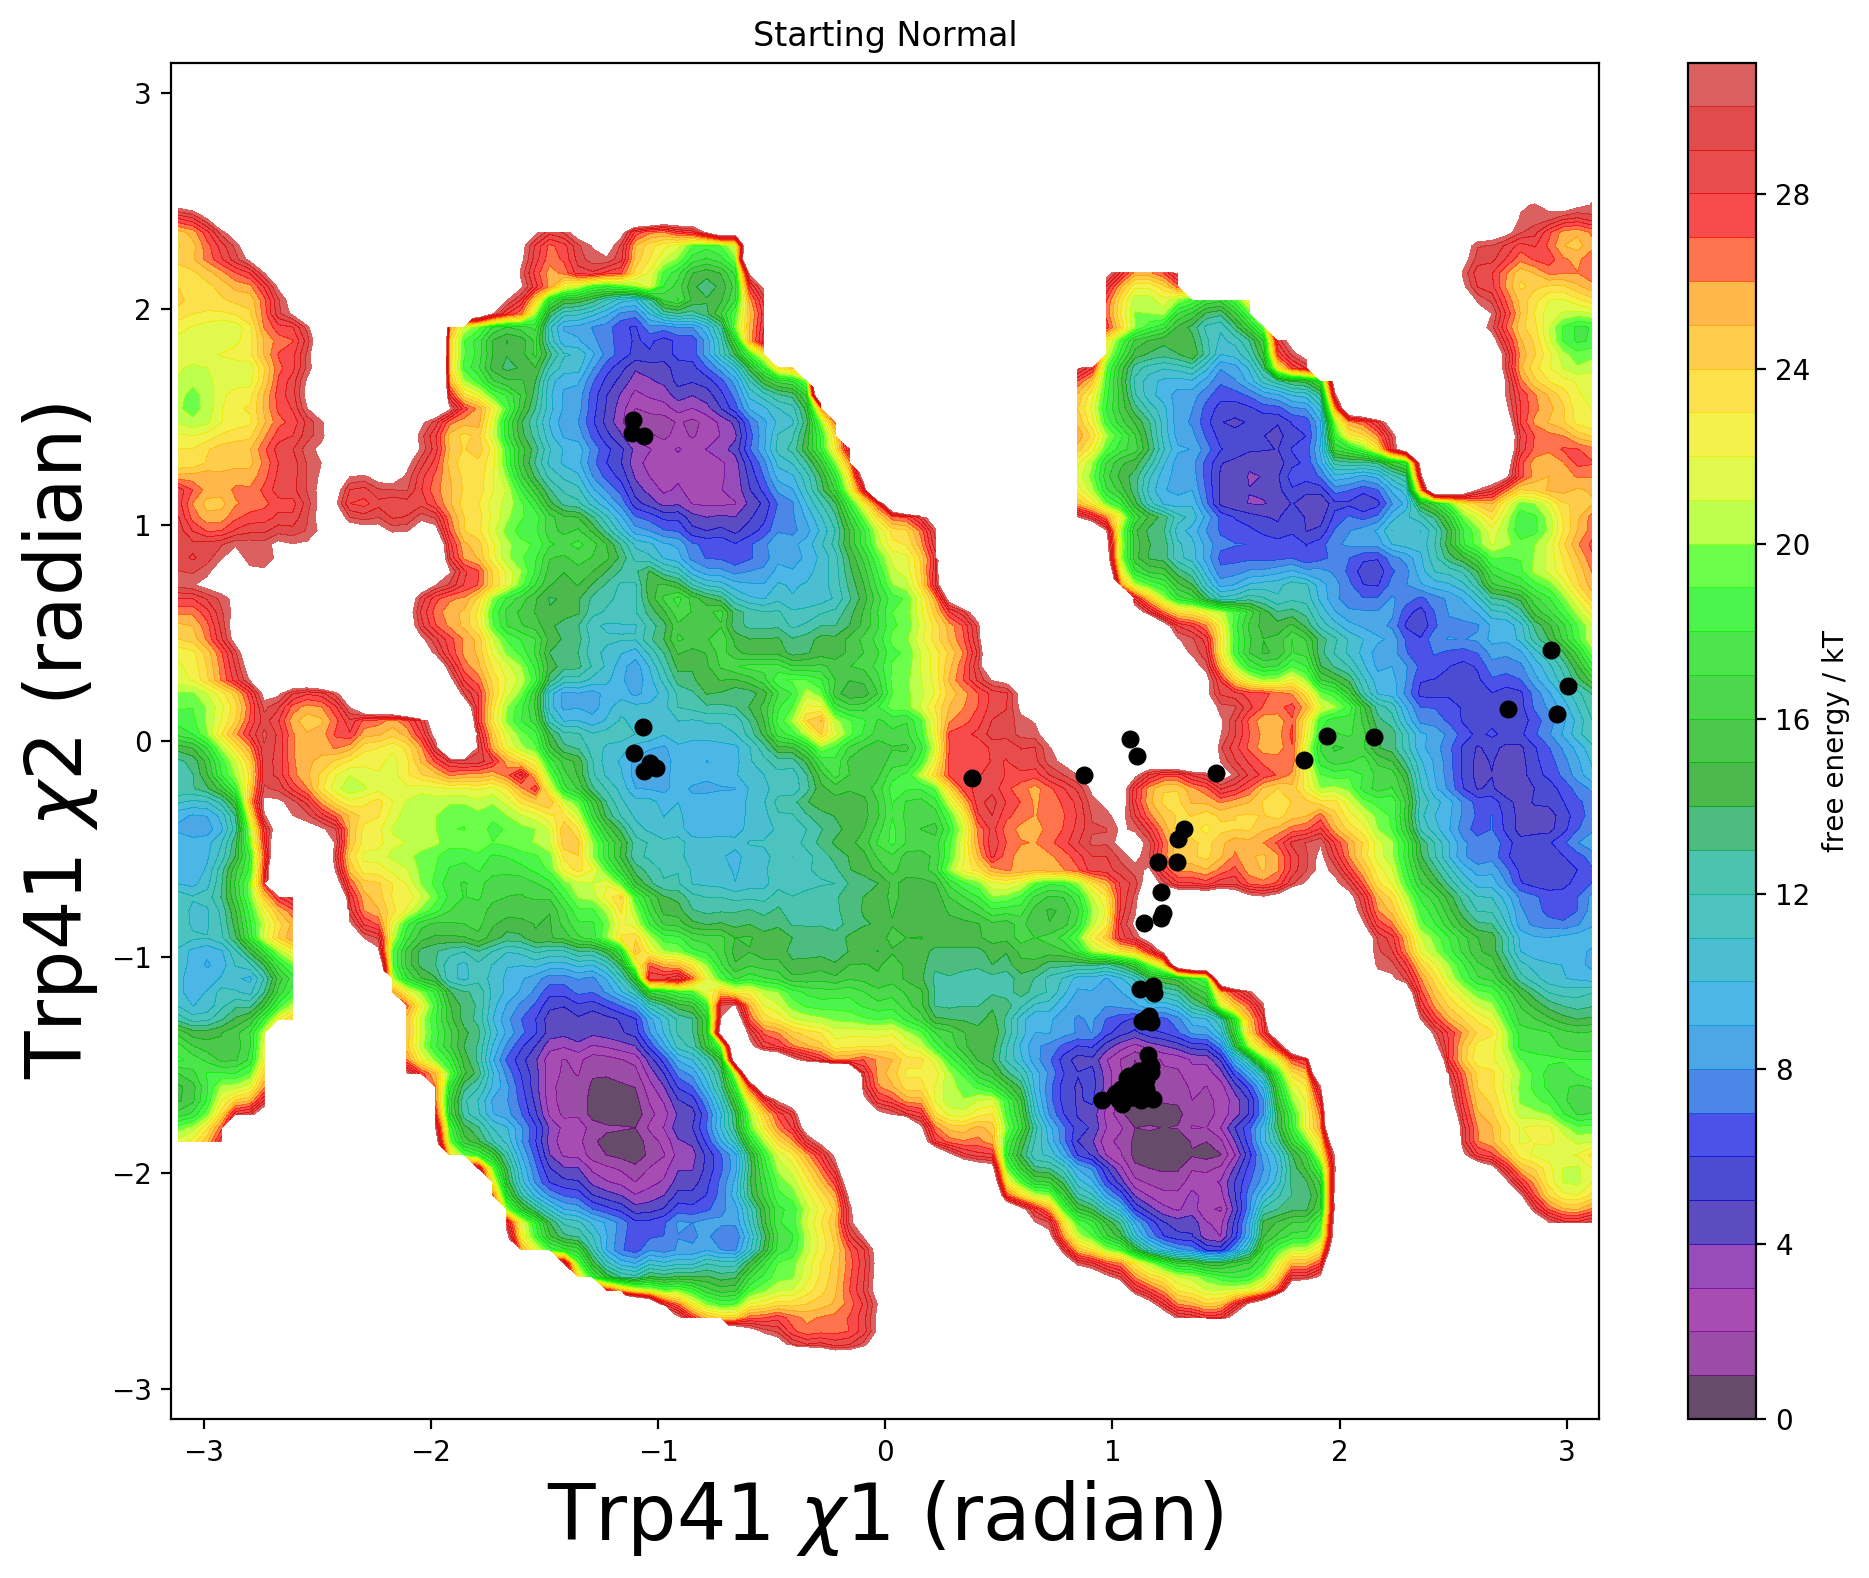

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_fe_trp_chi1, metad_fe_trp_chi2, weights=metad_pi, ax=ax, nbins=100, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.7)
ax.set_xlabel('Trp41 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Trp41 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_title('Starting Normal')
ax.scatter(chi1, chi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

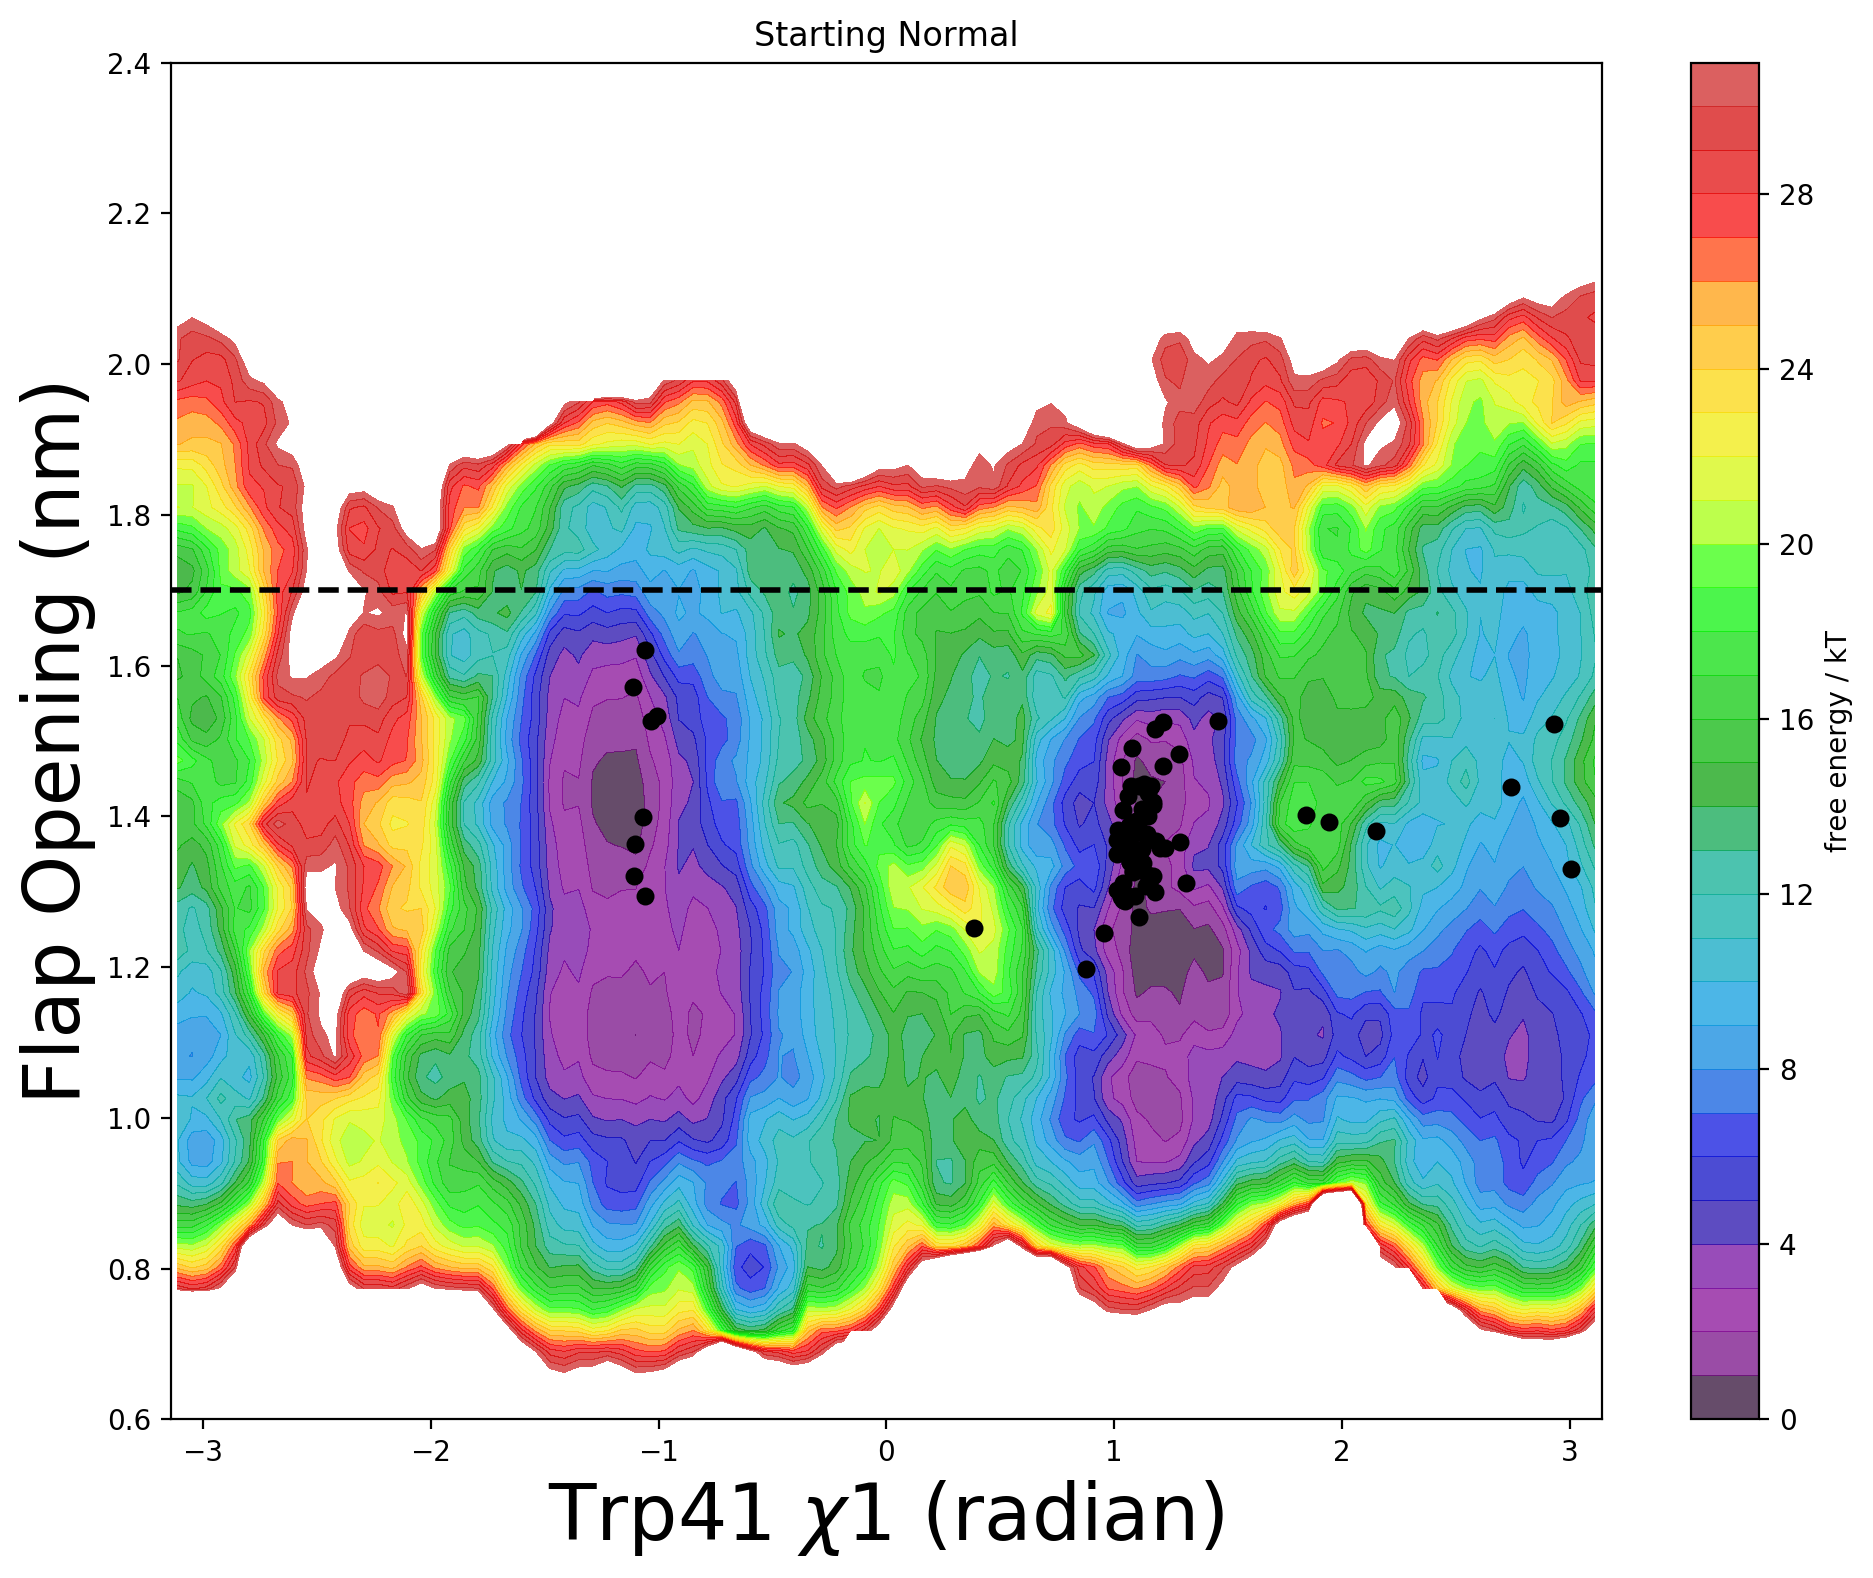

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_trp_chi, metad_fe_flap_open, weights=metad_poppi, ax=ax, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.7)
ax.set_xlabel('Trp41 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Flap Opening (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.6, 2.4)
ax.set_title('Starting Normal')
ax.axhline(y=1.7, color='black', linestyle='--', linewidth=2)
ax.scatter(chi1, d1, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

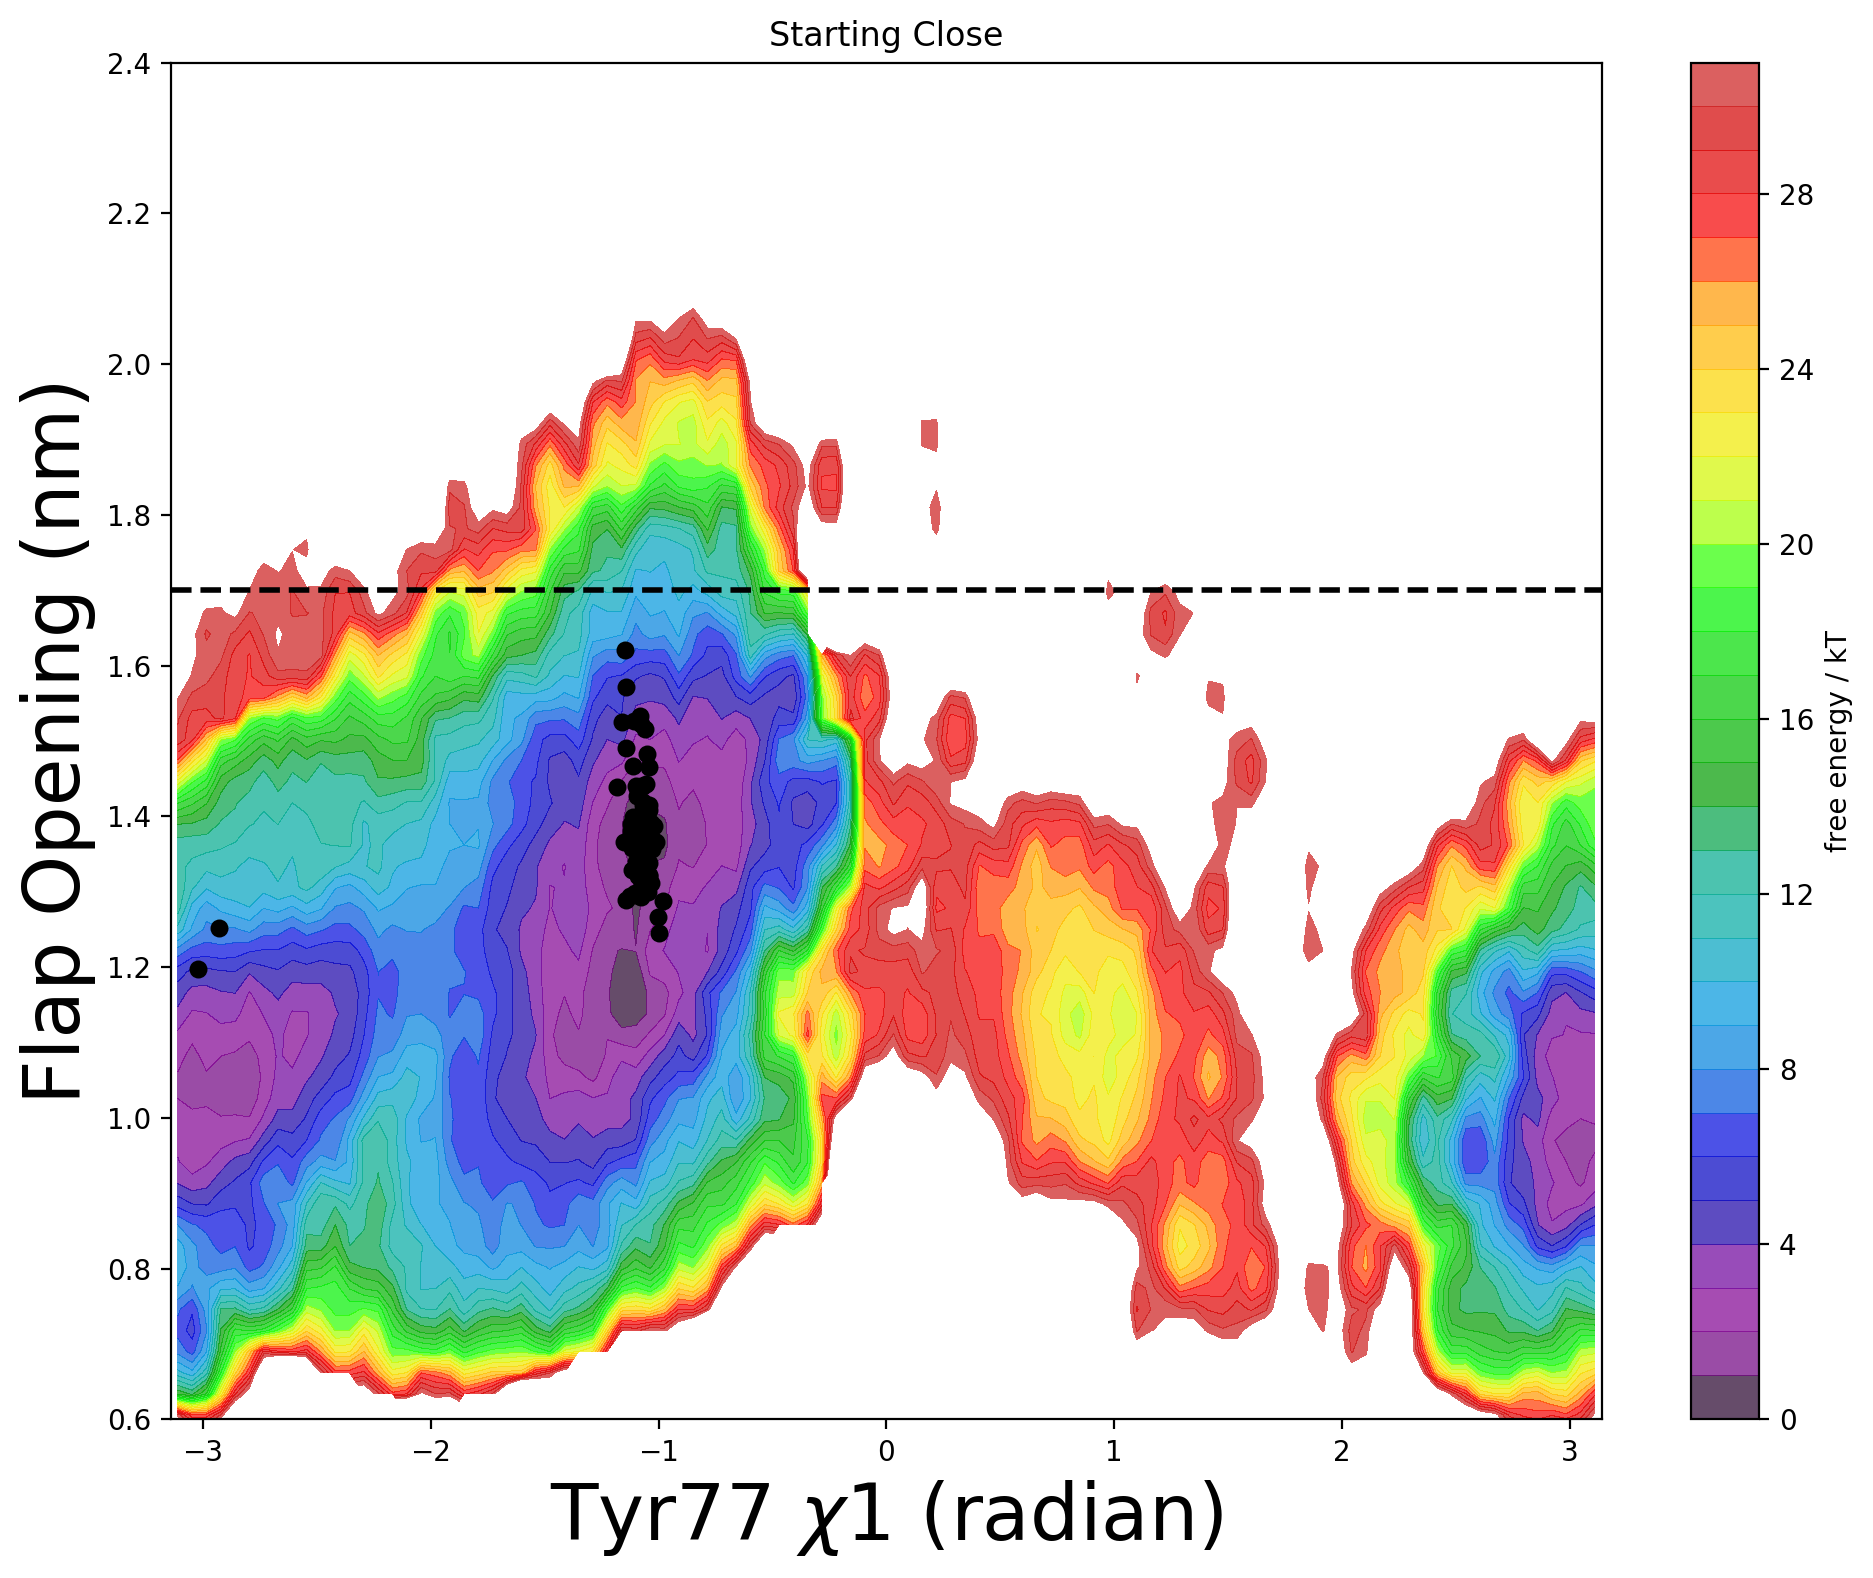

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_fe_tyr_chi1, metad_fe_flap_open, weights=metad_poppityr, ax=ax, levels=np.arange(0, 32, 1), vmin=0, vmax=32, alpha=0.7)
ax.set_xlabel('Tyr77 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Flap Opening (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.6, 2.4)
ax.set_title('Starting Close')
ax.axhline(y=1.7, color='black', linestyle='--', linewidth=2)
ax.scatter(tyrchi1, d1, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

In [ ]:
flipped = ((metad_fe_trp_chi1 < 0) & 
           (metad_fe_trp_chi1 > -2) & 
           (metad_fe_trp_chi2 > 0.75))

print(f'Reweighted probability of Flipped State: {np.sum(metad_pi[flipped]):.3f}')

Reweighted probability of Flipped State: 0.100


## Load AF COLVAR

In [15]:
colvar=np.loadtxt('./COLVAR-AF/COLVAR-combined-use')

In [13]:
type(colvar)

numpy.ndarray

In [16]:
chi1=colvar[:, 8]
chi2=colvar[:, 9]
tyrchi1=colvar[:, 5]
d1=colvar[:, 1]